<a href="https://colab.research.google.com/github/hericax/Pos/blob/master/projeto_3/aed_projeto_3(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset

O conjunto de dados consiste em filmes lançados em ou antes de julho de 2017. Os pontos de dados incluem elenco, equipe, palavras-chave da trama, orçamento, receita, pôsteres, datas de lançamento, idiomas, empresas de produção, países, contagem de votos no TMDB e média de votos. 
O conjunto possui 6 arquivo, o que foi utilizado no trabalho é o movies_metadata.csv, que contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens. Este conjunto de dados também possui arquivos contendo 26 milhões de classificações, de 270.000 usuários para todos os 45.000 filmes. 

As classificações estão em uma escala de 1 a 5 e foram obtidas no site oficial do GroupLens.

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


Hipóteses: 

1 - Quais são os gêneros de filmes melhor avaliados? 

2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu? 

3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?


### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [119]:
# BIBLIOTECAS
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Leitura do dataset
filmes = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')

In [121]:
# Pré-visaulização do dataset
filmes.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [122]:
# tamanho da base
print('Número de linhas e número de colunas:', filmes.shape)

Número de linhas e número de colunas: (45466, 24)


In [123]:
# fazendo uma cópia do dataset para ser trabalhado
df = filmes.copy()

In [124]:
# tamanho da base
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (45466, 24)


# RENOMEANDO AS FEATURES

In [125]:
df = df.rename(columns={'adult': "classificacao", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

# DESCRIÇÃO DAS FEATURES

'adulto' (booleano) - se o filme é exclusivo para adulto ou não . Contém dois valores: 'false' = 1, 'true' = 0

'despesas' (numérico) - possui o valor gasto na produção e divulgação dos vídeos 

'genero' (dicionário / texto) - contém qual ou quais são os gênceros de cada filme. Um filme pode ter um ou gêneros. Contém 29 valores possíveis. 

'id' (numérico) - número que identifica o filme 

'imdb_id'  (alfanumérico)- número unico que identifica o filme na base do imdb 

'lingua_original' (texto) - qual é o idioma original do filme produzido. Possui 90 valores possíveis.

'titulo_original' (texto) - titulo do filme 

'descricao' (texto) - descrição do filme 

'popularidade' (numérico)- qual é a popularidade do filme 

'cia_producao' (dicionário / texto) - qual(is) foi a companhia(s) que produziu o filme. Possui 19368 valores possíveis. Cada filme pode ter no mínimo um.

'pais_producao' (dicionário / texto) - quais foram os países onde os filmes foram gravados. Possui 155 valores possíveis. Cada filme pode ter no mínimo um.

'data_lancamento' (texto) - qual foi a data de lançamento do filme 

'receita'  (numérico) -  qual foi a receita obtida com o filme 

'duracao'  (numérico) - qual é a duração do filme em minutos 

'idiomas_falados' (dicionário/ texto) - quais são os idiomas que o filme possui tradução. Possui 73 valores possíveis.

'status' (texto) - status do filmes. Possui 7 valores possíveis: 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'

'slogan' (texto) - frase que define o filme. 

'titulo' (texto) - qual é o título do filme 

'video' (booleano) - se tem o video ou não do traile. Possui 3 valores possíveis: False, True, nan

'media_votos'  (numérico)- qual é a média de votos dada pelos usuários 

'qtde_votos'  (numérico)- qual foi a quantidade de votos

# EXCLUSÃO DE FEATURES COM DADOS RELEVANTES

In [126]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
df.drop(['belongs_to_collection'],axis = 1, inplace = True)
df.drop(['homepage'],axis = 1, inplace = True)
df.drop(['poster_path'],axis = 1, inplace = True)     
df.drop(['tagline'],axis = 1, inplace = True)

df.drop(['id','imdb_id'], inplace=True, axis=1)

In [127]:
# reindexando
#df = df.reset_index()

In [128]:
# tamanho da base
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (45466, 18)


# Tipos de features

A) Variáveis categóricas: adulto, genero , lingua_original, cia_producao, pais_producao, idiomas_falado, status, slogan, titulo, titulo_original, descricao, video

B) Variáveis discretas: despesas, id, imdb_id, data_lancamento, popularidade, receita, duracao(minutos), media_votos, qtde_votos  

In [129]:
df.dtypes

classificacao       object
despesas            object
genero              object
lingua_original     object
titulo_original     object
descricao           object
popularidade        object
cia_producao        object
pais_producao       object
data_lancamento     object
receita            float64
duracao            float64
idiomas_falados     object
status              object
titulo              object
video               object
media_votos        float64
qtde_votos         float64
dtype: object

# PRÉ-PROCESSANDO OS DADOS

## FEATURE CLASSIFICAÇÃO

In [130]:
df.classificacao.unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [131]:
df[(df.classificacao == ' - Written by Ørnås') | (df.classificacao == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.') | (df.classificacao == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.')]

,classificacao,despesas,genero,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,receita,duracao,idiomas_falados,status,titulo,video,media_votos,qtde_votos
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# DELETANDO OS TRÊS REGISTROS ACIMA QUE ESTÃO INVÁLIDOS
df.drop(19730, axis=0, inplace = True )
df.drop(29503, axis=0, inplace = True )
df.drop(35587, axis=0, inplace = True )

In [133]:
# VALIDANDO A EXCLUSÃO DOS REGISTROS
df[(df.classificacao == ' - Written by Ørnås') | (df.classificacao == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.') | (df.classificacao == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.')]

,classificacao,despesas,genero,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,receita,duracao,idiomas_falados,status,titulo,video,media_votos,qtde_votos


In [134]:
df.classificacao.unique()

array(['False', 'True'], dtype=object)

In [135]:
df.classificacao.value_counts()

False    45454
True         9
Name: classificacao, dtype: int64

Após a exclusão dos registros faltantes, os poucos filmes com classificação True, ou seja, somente para adultos, foram somente 9.
Portanto esta feature se tornou irrelevante e foi excluída.

In [136]:
# exclusão da feature
df.drop(['classificacao'], inplace=True, axis=1)

# Validando a exclusão
df.columns

Index(['despesas', 'genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos'],
      dtype='object')

## FEATURE DESPESAS

In [137]:
# tamanho da base
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (45463, 17)


In [138]:
df.despesas.describe()

count     45463
unique     1223
top           0
freq      36573
Name: despesas, dtype: object

In [139]:
print ('Qtde de registros únicos: ', len(df.despesas.unique()))

Qtde de registros únicos:  1223


In [140]:
df.despesas.value_counts()

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
6843500         1
11400000        1
111000          1
32350000        1
1934000         1
Name: despesas, Length: 1223, dtype: int64

Conforme observamos, dos 45463 registros da base, 36573 não possui valores de despesas, portanto a feature foi considerada irrelevante e excluída.

In [141]:
# exclusão da feature
df.drop(['despesas'], inplace=True, axis=1)

# Validando a exclusão
df.columns

Index(['genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos'],
      dtype='object')

## FEATURE GENERO

In [142]:
df[["genero", "titulo_original"]].head(3)

,genero,titulo_original
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [143]:
# Função para transformar a feature em uma lista de generos
from ast import literal_eval
df['genero'] = df['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):   
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #print ('names antes if len(names) > 1', names)
        tam = len(names)
        x = []
        if (tam > 1):
            t = 0
            #print ('entrei if')
            while t < tam:
                y = names[t]
                #print ('y', y)
                x.append(y)
                #print ('x', x)
                x.sort()
                #print ('x ordenado', x)
                t = t + 1
        if (tam == 1):            
            x.append(names[0])
            #print ('Unico genero', x)
        return x
        #print ('lista ordenada',x)
    return []
df['generos_ordenados'] = df['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros.

# VALIDANDO TRANSFORMAÇÃO
df[["generos_ordenados", "genero", "titulo_original"]].head(3)

,generos_ordenados,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Family, Fantasy]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Comedy, Romance]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [144]:
# VALIDANDO TRANSFORMAÇÃO
df[["generos_ordenados", "genero", "titulo_original"]].head(3)

,generos_ordenados,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Family, Fantasy]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Comedy, Romance]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [145]:
df.columns

Index(['genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'generos_ordenados'],
      dtype='object')

In [146]:
df.generos_ordenados.value_counts()

[Drama]                                                  5000
[Comedy]                                                 3621
[Documentary]                                            2723
[]                                                       2442
[Comedy, Drama]                                          1667
                                                         ... 
[Action, Adventure, History, Horror]                        1
[Documentary, Horror, Mystery]                              1
[Action, Adventure, Comedy, Crime, Mystery, Thriller]       1
[Adventure, Documentary, Fantasy]                           1
[Adventure, Animation, Family, Mystery, Romance]            1
Name: generos_ordenados, Length: 1921, dtype: int64

In [147]:
# Identificando e deletando os filmes que não possuem gênero e os deletando ( [] = 2442)
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    #print (t, df.titulo[t], df['generos_ordenados'][t])
    if (len(df['generos_ordenados'][t]) == 0):
        print ('registro zerado', df.titulo[t], df.genero[t])
        df.drop(t, axis=0, inplace = True )
        z = z + 1
    t = t + 1
print ("total de registros sem gênero excluídos", z)

total de registros 45463
registro zerado Kids of the Round Table []
registro zerado Last Summer in the Hamptons []
registro zerado Jupiter's Wife []
registro zerado Target []
registro zerado Desert Winds []
registro zerado Dos Crímenes []
registro zerado Federal Hill []
registro zerado The Beans of Egypt, Maine []
registro zerado A Great Day in Harlem []
registro zerado A Modern Affair []
registro zerado Rude []
registro zerado Billy's Holiday []
registro zerado Tarantella []
registro zerado The Eye of Vichy []
registro zerado To Cross the Rubicon []
registro zerado War Stories Our Mother Never Told Us []
registro zerado Vermont Is for Lovers []
registro zerado The Jar []
registro zerado Quartier Mozart []
registro zerado Babyfever []
registro zerado A Hungarian Fairy Tale []
registro zerado My Life and Times With Antonin Artaud []
registro zerado Midnight Dancers []
registro zerado Magic Hunter []
registro zerado A Boy Called Hate []
registro zerado The Story of Xinghua []
registro ze

KeyError: 19730

In [148]:
print ('Qtde de gêneros únicos: ', len(df.generos_ordenados.value_counts()))

Qtde de gêneros únicos:  1921


In [149]:
# Identificando os valores únicos dos gênero (da lista de gêneros)
df.generos_ordenados.value_counts().head(10)

[Drama]                     5000
[Comedy]                    3621
[Documentary]               2723
[]                          1977
[Comedy, Drama]             1667
[Drama, Romance]            1644
[Comedy, Romance]           1143
[Comedy, Drama, Romance]    1031
[Horror]                     974
[Horror, Thriller]           680
Name: generos_ordenados, dtype: int64

Text(0.5, 1.0, 'Gêneros x média de votos')

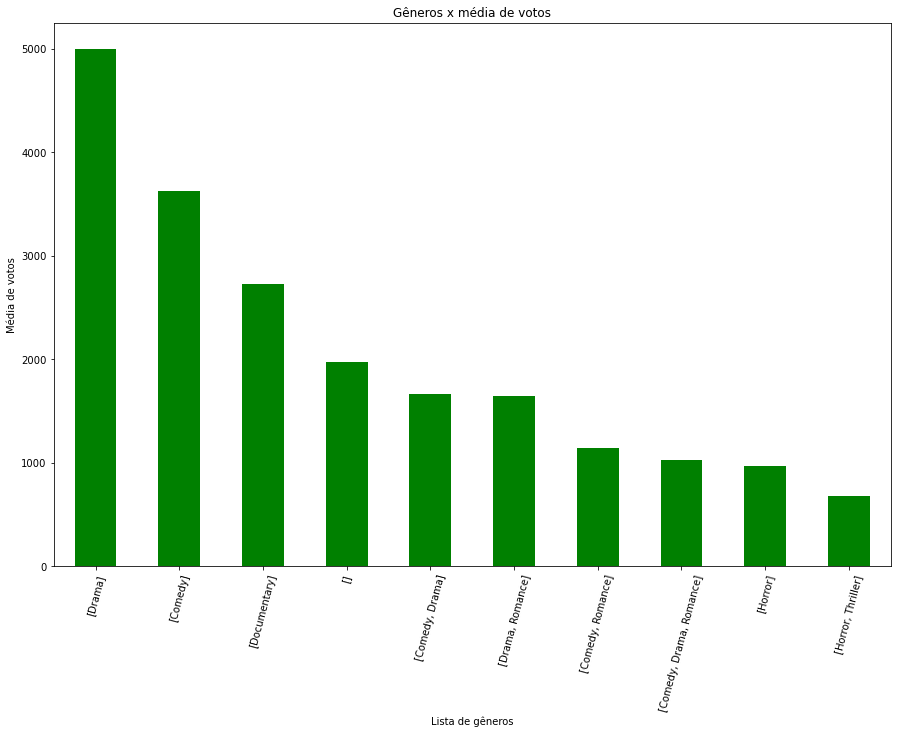

In [150]:
# plotando os generos
df.generos_ordenados.value_counts().head(10).plot.bar(color='green')

plt.xticks(rotation=75)
plt.xlabel("Lista de gêneros")
plt.ylabel("Média de votos")
plt.title("Gêneros x média de votos")

### Abaixo, transformo os gêneros em features

In [152]:
# resetando os índices
df = df.reset_index()

In [153]:
df.columns

Index(['index', 'genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'generos_ordenados'],
      dtype='object')

In [154]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(df.generos_ordenados)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x  = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = df.generos_ordenados[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = df.generos_ordenados[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            generos_unicos.sort()
            #print ("lista com os generos únicos ordenado", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [155]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(df.generos_ordenados).transform(df.generos_ordenados)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [156]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo], axis=1)

In [157]:
# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [158]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
df.columns

Index(['index', 'genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'generos_ordenados', 'index', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [159]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
df = df.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})

In [160]:
# contabilizando a qtde de registros true de cada gênero
lista_generos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(lista_generos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    genero = lista_generos[x]
    total_genero = sum(df[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)

total de generos 20
genero:  acao | 6596
genero:  aventura | 3496
genero:  animacao | 1935
genero:  comedia | 13182
genero:  crime | 4307
genero:  documentario | 3932
genero:  drama| 20265
genero:  familia | 2770
genero:  fantasia | 2313
genero:  estrangeiro | 1622
genero:  historia | 1398
genero:  horror | 4673
genero:  musical | 1598
genero:  misterio | 2467
genero:  romance | 6735
genero:  ficcao_cientifica | 3049
genero:  filmes_tv | 767
genero:  suspense | 7624
genero:  gerra | 1323
genero:  ocidental | 1042


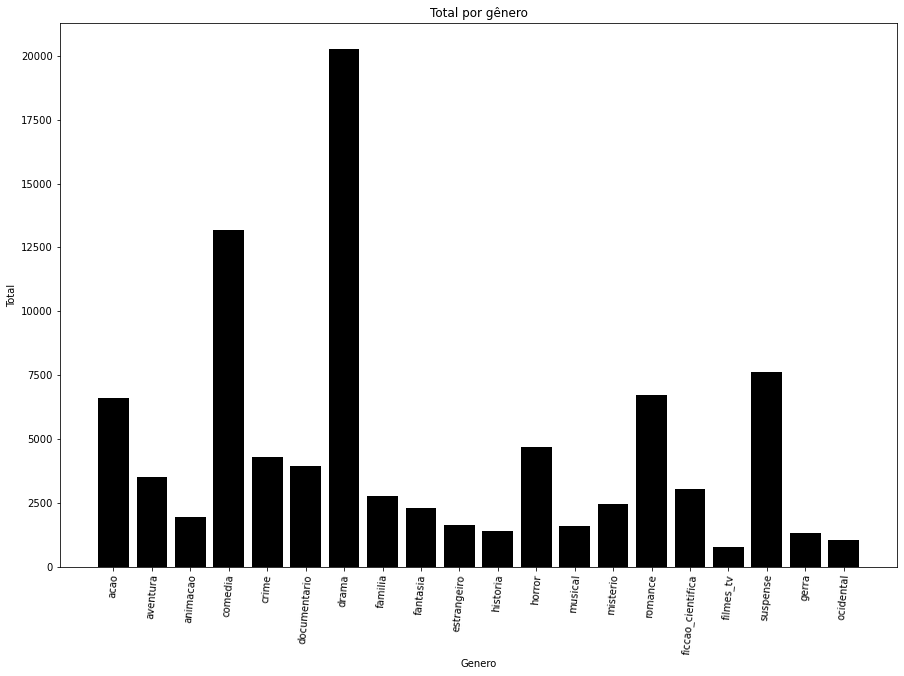

In [161]:
#plotando os totais por generos
plt.bar(lista_generos, lista_totais,color = 'black')

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=85)

plt.xlabel("Genero")
plt.ylabel("Total")
plt.title("Total por gênero")

plt.show()

Conforme observamos, tanto na lista de gêneros únicos e os gêneros separadamente, o mais frequente é o drama, ou seja, a maior parte dos filmes disponível na base tem classificação "Drama" 

## FEATURE LINGUA ORIGINAL

In [162]:
df.lingua_original.head(3)

0    en
1    en
2    en
Name: lingua_original, dtype: object

In [163]:
df.lingua_original.describe()

count     44987
unique       89
top          en
freq      31945
Name: lingua_original, dtype: object

In [164]:
df.lingua_original.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'cy', 'vi',
       'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo', 'ca',
       'fi', 'th', 'sk', 'hu', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

Identificando registros nulos e nan

In [165]:
# identificando a qtde de registros com lingua_original = nan
len(df[df.lingua_original.isna()])

11

In [166]:
# identificando os registros com lingua_original = nan
df[['titulo','lingua_original']][df.lingua_original.isna()]

,titulo,lingua_original
19119,Shadowing the Third Man,NaN
21136,Unfinished Sky,NaN
22366,13 Fighting Men,NaN
31674,Lambchops,NaN
36939,Prince Bayaya,NaN
40579,Song of Lahore,NaN
41404,Annabelle Serpentine Dance,NaN
43589,Lettre d'une inconnue,NaN
43942,Yarn,NaN
44108,WiNWiN,NaN


In [167]:
# resultado da moda
df.lingua_original.mode()[0]

'en'

In [168]:
# atualizando pela moda
df.lingua_original = df.lingua_original.fillna('en')

In [169]:
# validando a substituição os registros com lingua_original = nan
df[df.lingua_original.isnull()]

,index,genero,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,receita,...,historia,horror,musical,misterio,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental


CONVERTENDO A SIGLA DO IDIOMA NO NOME DO IDIOMA

In [170]:
# Convertando a sigla do idioma no nome do idioma

sigla_lingua = df.lingua_original.sort_values().unique()
sigla_lingua

array(['ab', 'af', 'am', 'ar', 'ay', 'bg', 'bm', 'bn', 'bo', 'bs', 'ca',
       'cn', 'cs', 'cy', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
       'fa', 'fi', 'fr', 'fy', 'gl', 'he', 'hi', 'hr', 'hu', 'hy', 'id',
       'is', 'it', 'iu', 'ja', 'jv', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky',
       'la', 'lb', 'lo', 'lt', 'lv', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt',
       'nb', 'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru',
       'rw', 'sh', 'si', 'sk', 'sl', 'sm', 'sq', 'sr', 'sv', 'ta', 'te',
       'tg', 'th', 'tl', 'tr', 'uk', 'ur', 'uz', 'vi', 'wo', 'xx', 'zh',
       'zu'], dtype=object)

In [171]:
# Convertando a sigla do idioma no nome do idioma, usando o padrão ISO 639 (https://omegat.sourceforge.io/manual-latest/pt_BR/appendix.languages.html). 

df['lingua'] = df['lingua_original'].map({
    '': 'No Language', ' ': 'No Language',
    'xx':'No Language',    'en': 'Inglês',     'fr': 'Francês', 
    'zh': 'Chines',    'it': 'Italiano' ,     'fa': 'Persa', 
    'nl': 'Neerlandês',     'de': 'Alemão',     'cn': 'Mandarim padrão', 
    'ar': 'Argentino',     'es' : 'Espanhol',     'ru': 'Russo',
    'sv': 'Espanhol',     'ja': 'Japonês',     'ko': 'Coreano', 
    'sr': 'Sérvio',     'bn': 'Bengali',     'he': 'Hebraico', 
    'pt': 'Português',     'wo': 'Wolof',     'ro': 'Romeno', 
    'cy': 'Galês',     'vi': 'Vietnamita',       'cs':'hrv' , 
       'da': 'Dinamarquês',        'no': 'Norueguês',        'nb': 'Bokmål norueguês', 
       'pl': 'Polonês',        'el': 'Grego, Moderno',        'sh': 'Shan', 
       'mk': 'Macedônio',        'bo': 'Tibetano',        'ca': 'Catalão',
       'fi': 'Finlandês',        'th': 'Tailandês',        'sk': 'Eslovaco', 
       'hu': 'Húngaro',        'bs': 'Bósnio',        'hi': 'Hindi', 
       'tr': 'Turco',        'is': 'Islandês',        'ps': 'Pachto', 
       'ab': 'Abecásio',        'eo': 'Esperanto',       'ka': 'Georgiano', 
       'mn': 'Mongol',        'bm': 'Bambara',        'zu': 'Zulu', 
       'uk': 'Ucraniano',        'af': 'Africâner',        'la': 'Latim', 
       'et': 'Estoniano',        'ku': 'Curdo',        'fy': 'Frísio ocidental', 
       'lv': 'Letão',       'ta': 'Tâmil',        'sl': 'Esloveno', 
       'tl': 'Tagalog',        'ur': 'Urdu',        'rw': 'Kinyarwanda', 
       'id': 'Indonésio',        'bg': 'Búlgaro', 
       'mr': 'Marathi (Marāṭhī)', 'lt': 'Lituano', 'kk': 'Cazaque', 'ms': 'Malaio',
       'sq': 'Albanês', 
       'qu': 'Quechua', 'te': 'Telugu', 'am': 'Amárico', 
       'jv': 'Javanês', 'tg': 'Tajique', 'ml': 'Malayalam', 
       'hr': 'Croata', 'lo': 'Lao', 'ay': 'Aymará',
       'kn': 'Canarês', 
       'eu': 'Basco', 'ne': 'Nepali', 'pa': 'Panjabi, Punjabi', 
       'ky': 'Quirguiz, Kyrgyz', 'gl': 'Galego', 'uz': 'Uzbeque', 
       'sm': 'Samoano', 'mt': 'Maltês', 'hy': 'Armênio', 
       'iu': 'Inuktitut', 'lb': 'Luxemburguês, Letzeburgesch', 'si': 'Sinhala, Cingalês'
       })

In [172]:
# validando a transformação
df[['lingua','lingua_original','titulo']][27:32]

,lingua,lingua_original,titulo
27,Inglês,en,Persuasion
28,Francês,fr,The City of Lost Children
29,Chines,zh,Shanghai Triad
30,Inglês,en,Dangerous Minds
31,Inglês,en,Twelve Monkeys


In [173]:
# verificando se há registros nulos ou vazios
df['lingua'].unique()

array(['Inglês', 'Francês', 'Chines', 'Italiano', 'Persa', 'Neerlandês',
       'Alemão', 'Mandarim padrão', 'Argentino', 'Espanhol', 'Russo',
       'Japonês', 'Coreano', 'Sérvio', 'Bengali', 'Hebraico', 'Português',
       'Wolof', 'Romeno', 'Galês', 'Vietnamita', 'hrv', 'Dinamarquês',
       'Norueguês', 'Bokmål norueguês', 'Polonês', 'Grego, Moderno',
       'Shan', 'No Language', 'Macedônio', 'Tibetano', 'Catalão',
       'Finlandês', 'Tailandês', 'Eslovaco', 'Húngaro', 'Bósnio', 'Hindi',
       'Turco', 'Islandês', 'Pachto', 'Abecásio', 'Esperanto',
       'Georgiano', 'Mongol', 'Bambara', 'Zulu', 'Ucraniano', 'Africâner',
       'Latim', 'Estoniano', 'Curdo', 'Frísio ocidental', 'Letão',
       'Tâmil', 'Esloveno', 'Tagalog', 'Urdu', 'Kinyarwanda', 'Indonésio',
       'Búlgaro', 'Marathi (Marāṭhī)', 'Lituano', 'Cazaque', 'Malaio',
       'Albanês', 'Quechua', 'Telugu', 'Amárico', 'Javanês', 'Tajique',
       'Malayalam', 'Croata', 'Lao', 'Aymará', 'Canarês', 'Basco',
       'Nep

In [174]:
print ('Qtde de registros:', len(df.lingua.unique()))

Qtde de registros: 88


In [175]:
df.lingua.value_counts().sort_values(ascending = False).head(10)

Inglês      31956
Francês      2422
Italiano     1517
Espanhol     1357
Japonês      1336
Alemão       1072
Russo         822
Hindi         507
Coreano       442
Chines        406
Name: lingua, dtype: int64

Text(0.5, 1.0, 'Total por idioma falado - os 10 mais frequentes')

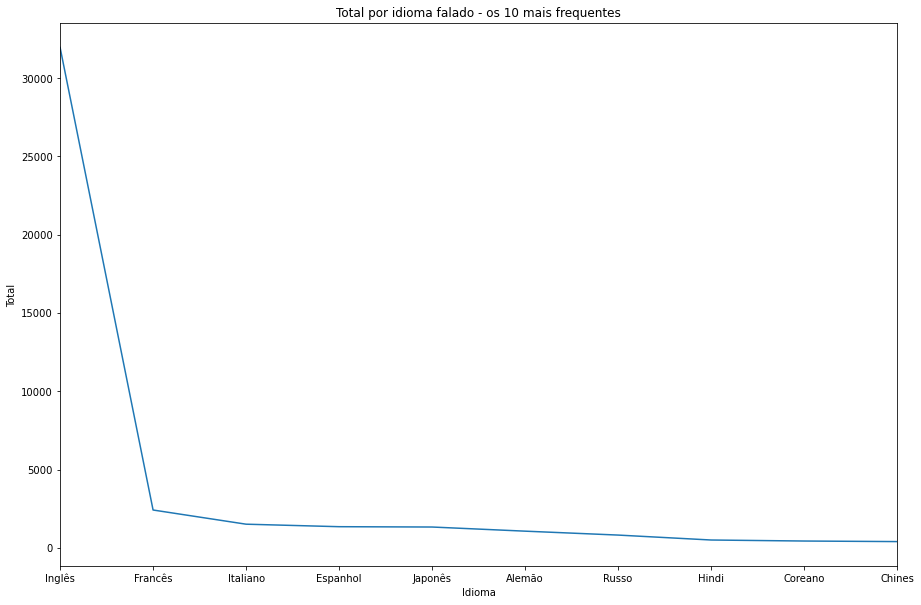

In [176]:
df.lingua.value_counts().sort_values(ascending = False).head(10).plot()

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=0)

plt.xlabel("Idioma")
plt.ylabel("Total")
plt.title("Total por idioma falado - os 10 mais frequentes")

### FEATURE POPULARIDADE

In [177]:
df.popularidade.head(3)

0    21.9469
1    17.0155
2    11.7129
Name: popularidade, dtype: object

In [178]:
df.popularidade.describe()

count     44995
unique    43803
top         0.0
freq         34
Name: popularidade, dtype: object

In [179]:
df.popularidade.unique()

array([21.946943, 17.015539, 11.7129, ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [180]:
print ('Total de registros únicos de populariade:', len(df.popularidade.unique()))

Total de registros únicos de populariade: 43804


In [181]:
# convertendo a featue para float
df.popularidade = df.popularidade.astype('float64')

In [182]:
df.popularidade.value_counts().sort_values(ascending = False).head(10)

0.000000    59
0.000001    52
0.000308    42
0.000220    40
0.002001    28
0.000844    26
0.000578    23
0.003013    21
0.001393    18
0.001177    16
Name: popularidade, dtype: int64

Text(0.5, 1.0, 'Total por popularidade - os 10 mais frequentes')

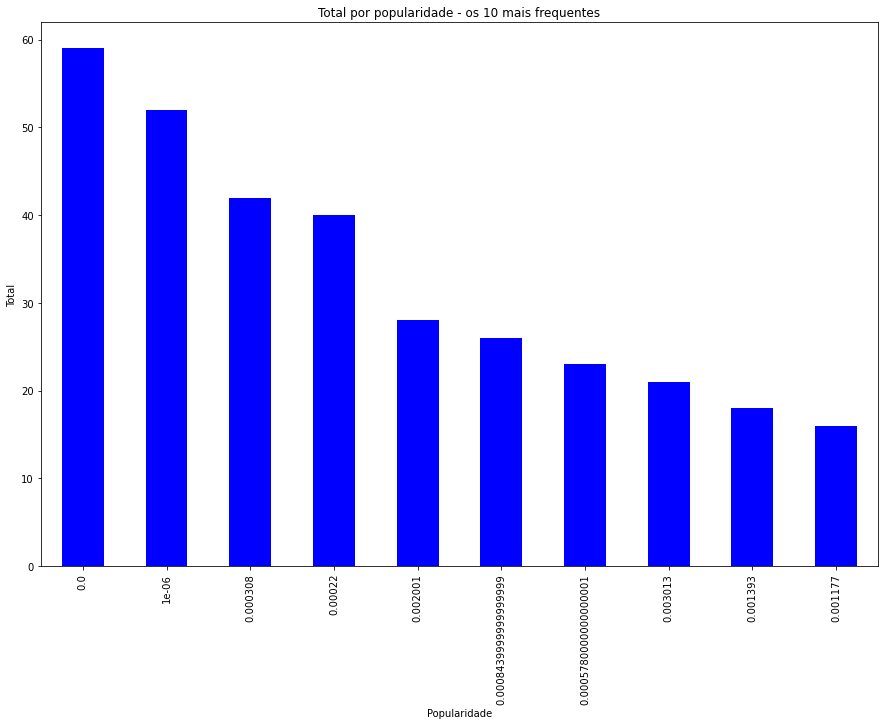

In [183]:
df.popularidade.value_counts().sort_values(ascending = False).head(10).plot.bar(color = "blue")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("Popularidade")
plt.ylabel("Total")
plt.title("Total por popularidade - os 10 mais frequentes")

In [ ]:
Devido à definição e entendimento da feature não estar claro, não será utilizado no trabalho

# FEATURE COMPANHIA DE PRODUÇÃO (CIA_PRODUCAO)

In [184]:
df.cia_producao.head(3)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
Name: cia_producao, dtype: object

In [185]:
df.cia_producao.describe()

count     44995
unique    22667
top          []
freq      11488
Name: cia_producao, dtype: object

In [186]:
print ('Qtde de registros sem cia_producao: ', df.cia_producao.isnull().sum())

Qtde de registros sem cia_producao:  3


In [187]:
# deletando os registros em branco
df = df.dropna(subset=['cia_producao'])

In [188]:
# validando exclusão
print ('Qtde de registros sem cia_producao: ', df.cia_producao.isnull().sum())

Qtde de registros sem cia_producao:  0


In [189]:
# transformar a feature em uma nova coluna contento a lista de companhia de cada filme
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['cia_producao'] = df['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_cia_producao'] = df['cia_producao'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

,novo_cia_producao,cia_producao,titulo_original
0,[Pixar Animation Studios],"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story
1,"[TriStar Pictures, Teitler Film, Interscope Co...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji
2,"[Warner Bros., Lancaster Gate]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men


In [190]:
print ('Qtde de registros unicos de CIA de produção: ', len(df.novo_cia_producao.value_counts()))

Qtde de registros unicos de CIA de produção:  22420


In [191]:
df.novo_cia_producao.value_counts().sort_values(ascending = False).head(10)

[]                                          11488
[Metro-Goldwyn-Mayer (MGM)]                   740
[Warner Bros.]                                540
[Paramount Pictures]                          504
[Twentieth Century Fox Film Corporation]      438
[Universal Pictures]                          320
[RKO Radio Pictures]                          247
[Columbia Pictures Corporation]               207
[Columbia Pictures]                           146
[Mosfilm]                                     145
Name: novo_cia_producao, dtype: int64

Text(0.5, 1.0, 'Total por CIA - os 10 mais frequentes')

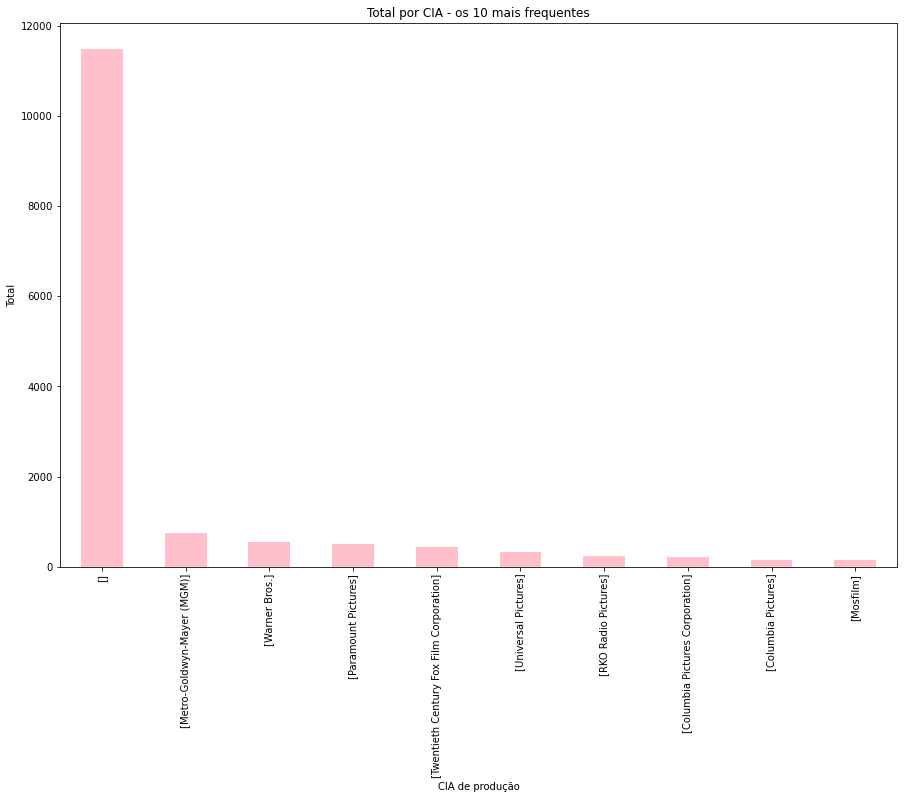

In [192]:
# Plotando as 10 cia de produção mais frequentes
df.novo_cia_producao.value_counts().sort_values(ascending = False).head(10).plot.bar(color = "pink")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("CIA de produção")
plt.ylabel("Total")
plt.title("Total por CIA - os 10 mais frequentes")

In [193]:
df.columns

Index(['index', 'genero', 'lingua_original', 'titulo_original', 'descricao',
       'popularidade', 'cia_producao', 'pais_producao', 'data_lancamento',
       'receita', 'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'generos_ordenados', 'index', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'lingua', 'novo_cia_producao'],
      dtype='object')

In [194]:
# exclusão da feature
df.drop(['index'], inplace=True, axis=1)

In [ ]:
# resetando os índices
df_cia_teste = df.copy()

In [ ]:
x = {}
x = df_cia_teste.novo_cia_producao.explode()
x

In [249]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    if x in df:
        cia = df.novo_cia_producao[x]
        tam_cia = len(cia)
        i = z = b = 0
        while (i < tam_cia): 
            cada_cia_registo = df.novo_cia_producao[x][i]
            if (not cada_cia_registo in cia_unicos):      
                cia_unicos.append(cada_cia_registo)
                z +=1
            i += 1        
    x += 1
print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

total de registros do dataset:  44995


KeyboardInterrupt: 

In [197]:
# transformar as opções possíveis de CIA em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
cia_x = te.fit(df.novo_cia_producao).transform(df.generos_ordenados)
df_cia = pd.DataFrame(cia_x, columns=te.columns_) 

# resetando os índices
df_cia = df_cia.reset_index()

# Mesclado os dois dataframes
#horizontal_stack = pd.concat([df, df_novo], axis=1)

In [ ]:
df_cia.value_counts().head(10)

### FEATURE PAIS DE PRODUÇÃO

In [198]:
df['pais_producao'].head(3)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: pais_producao, dtype: object

In [199]:
# Recupera os dados da feature, cria uma lista e salva numa nova coluna
from ast import literal_eval
df['pais_producao'] = df['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos paises, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_pais_producao'] = df['pais_producao'].apply(get_list) #O retorno será uma lista com todos os paises. quando coloco uma coluna que não existe, ele cria a coluna automaticamente


df[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

,novo_pais_producao,pais_producao,titulo_original
0,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Toy Story
1,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Jumanji
2,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Grumpier Old Men


In [200]:
# valores únicos
df.novo_pais_producao.unique()

TypeError: unhashable type: 'list'

In [201]:
# lista dos 10 países mais comuns
df.novo_pais_producao.value_counts().sort_values(ascending = False).head(10)

[United States of America]    17806
[]                             5979
[United Kingdom]               2228
[France]                       1646
[Japan]                        1343
[Italy]                        1025
[Canada]                        838
[Germany]                       745
[India]                         734
[Russia]                        734
Name: novo_pais_producao, dtype: int64

Text(0.5, 1.0, 'Total por paós - os 10 mais frequentes')

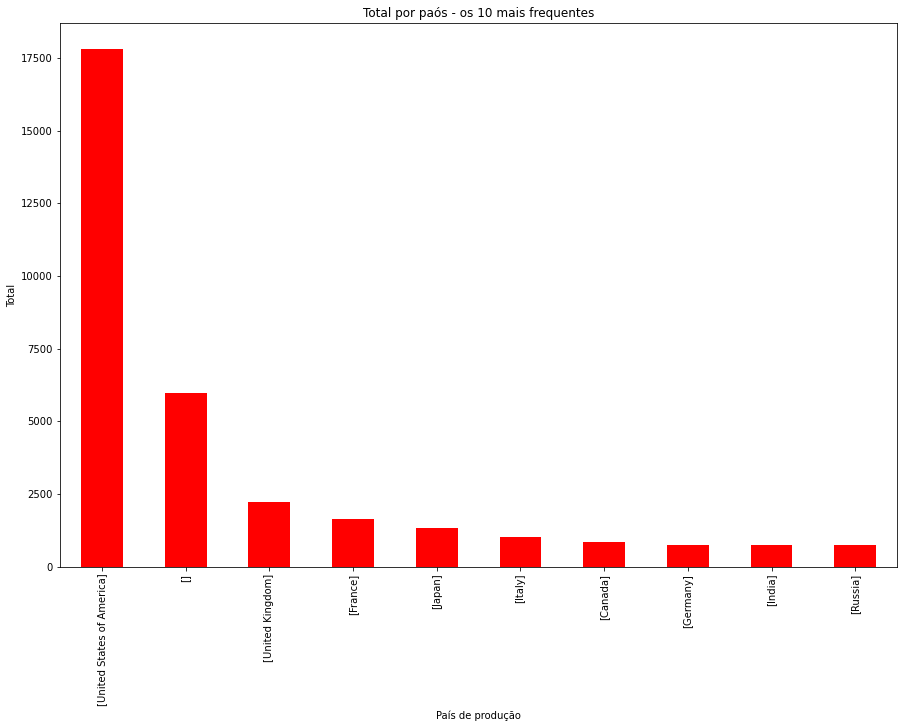

In [202]:
df.novo_pais_producao.value_counts().sort_values(ascending = False).head(10).plot.bar(color = "red")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("País de produção")
plt.ylabel("Total")
plt.title("Total por paós - os 10 mais frequentes")

Comparar a lista de países com os países convertidos para feature

In [203]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = df.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = df.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print ('Lista de país onde os filmes foram produzidos: \n', pais_producao_unicos)

total de registros do dataset:  44995


KeyError: 19264

In [204]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
pais_producao_x = te.fit(df.novo_pais_producao).transform(df.novo_pais_producao)
df_novo_pais_producao = pd.DataFrame(pais_producao_x, columns=te.columns_)

# resetando os índices
df_novo_pais_producao = df_novo_pais_producao.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo_pais_producao], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [205]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_pais_producao.drop(['index'],axis = 1, inplace = True)

In [206]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_pais = df_novo_pais_producao.columns
print (lista_pais)
tam = len(lista_pais)
print ("total de pais", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    pais = lista_pais[x]
    total_pais = sum(df_novo_pais_producao[pais] == True)    
    print ('pais: ', pais, '|',total_pais)
    x += 1
    lista_totais.append (total_pais)

lista_pais_producao = list(zip(lista_totais,lista_pais))

del(lista_pais_producao[0]) # excluindo o valor index

print (lista_pais_producao)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom',
       'United States Minor Outlying Islands', 'United States of America',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yugoslavia',
       'Zimbabwe'],
      dtype='object', length=155)
total de pais 155
pais:  Afghanistan | 8
pais:  Albania | 4
pais:  Algeria | 13
pais:  Angola | 3
pais:  Argentina | 249
pais:  Armenia | 8
pais:  Aruba | 6
pais:  Australia | 565
pais:  Austria | 200
pais:  Azerbaijan | 2
pais:  Bahamas | 5
pais:  Bangladesh | 2
pais:  Barbados | 1
pais:  Belarus | 9
pais:  Belgium | 423
pais:  Bermuda | 1
pais:  Bhutan | 4
pais:  Bolivia | 10
pais:  Bosnia and Herzegovina | 35
pais:  Botswana | 3
pais: Brazil | 287
pais:  Brunei Darussalam | 1
pais:  Bulgaria | 54
pais:  Burkina Faso | 10
pais:  Cambodia | 9
pais:  Cameroon | 5
pais:  Canada | 1745
pais:  Cayman Isla

In [207]:
# ordenando e revertendo a ordenação
lista_pais_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_pais_producao[0:10]

[(20917, 'United States of America'),
 (3947, 'United Kingdom'),
 (3849, 'France'),
 (2173, 'Germany'),
 (2099, 'Italy'),
 (1745, 'Canada'),
 (1617, 'Japan'),
 (910, 'Spain'),
 (895, 'Russia'),
 (821, 'India')]

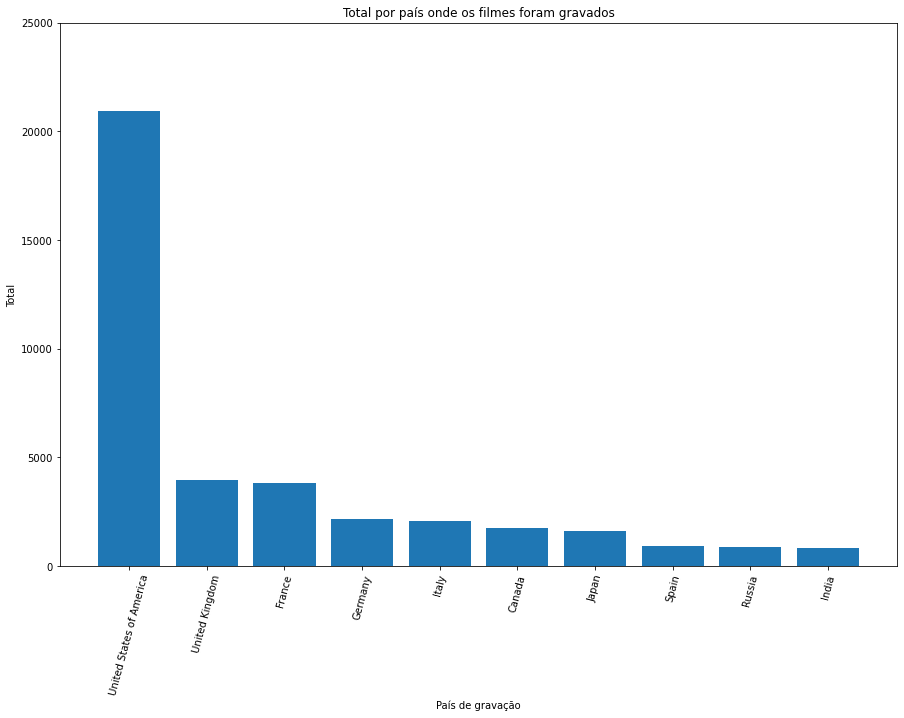

In [208]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_pais_producao[0:10]]
y = [v[0] for v in lista_pais_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 25000)

plt.xticks(rotation=75)

plt.xlabel("País de gravação")
plt.ylabel("Total")
plt.title("Total por país onde os filmes foram gravados")

plt.show()

Ao comparar a lista de países e os países isoladamente, há pequenas variações entre as posições no ranking, a excessão da Spain, que aparece na listagem dos gêneros isolamente e dos registros em branco, que aparecem somente na listagem da lista de países.

## FEATURE DATA DE LANÇAMENTO

In [209]:
df.data_lancamento.head(3)

0    1995-10-30
1    1995-12-15
2    1995-12-22
Name: data_lancamento, dtype: object

In [210]:
df.data_lancamento.describe()

count          44921
unique         17244
top       2008-01-01
freq             133
Name: data_lancamento, dtype: object

In [211]:
# Separa o ano da data de lançamento e salvar numa nova featue
data = df['data_lancamento'].astype(str) # se o resultado for uma lista das datas do banco
print (data)
ano = [a.split('-')[0] for a in data]
df['ano_lancamento'] = ano

# validando a transformação
df[['data_lancamento','ano_lancamento']].head(2)

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
44993           nan
44994    2011-11-17
44995    2003-08-01
44996    1917-10-21
44997    2017-06-09
Name: data_lancamento, Length: 44995, dtype: object


,data_lancamento,ano_lancamento
0,1995-10-30,1995
1,1995-12-15,1995


In [212]:
df.ano_lancamento.unique()

array(['1995', '1996', '1994', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1974', '1970', '1960', '1955', '1959',
       '1968', '1980', '1988', '1975', '2002', '1948', '1943', '1950',
       '1987', '1973', '1997', '1956', '1958', '1972', '1953', '1998',
       '1933', '2010', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1939', '1947', '1946', '1945',
       '1938', '1935', '1936', '1926', '1949', '1932', '1979', '1971',
       '1986', '2013', '1978', '1966', '1962', '1983', '1984', '1931',
       '1922', '1999', '1927', '1929', '1930', '1928', '2012', '1925',
       '2000', '1919', '1923', '1920', '1918', '1921', 'nan', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

In [213]:
# contabilizar a qtde de registro com nan
len(df.ano_lancamento[df.ano_lancamento.isnull()])

0

In [214]:
df_teste = df.copy()

In [215]:
df_teste.ano_lancamento.unique()

array(['1995', '1996', '1994', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1974', '1970', '1960', '1955', '1959',
       '1968', '1980', '1988', '1975', '2002', '1948', '1943', '1950',
       '1987', '1973', '1997', '1956', '1958', '1972', '1953', '1998',
       '1933', '2010', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1939', '1947', '1946', '1945',
       '1938', '1935', '1936', '1926', '1949', '1932', '1979', '1971',
       '1986', '2013', '1978', '1966', '1962', '1983', '1984', '1931',
       '1922', '1999', '1927', '1929', '1930', '1928', '2012', '1925',
       '2000', '1919', '1923', '1920', '1918', '1921', 'nan', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

In [216]:
df_teste.ano_lancamento.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
44993    False
44994    False
44995    False
44996    False
44997    False
Name: ano_lancamento, Length: 44995, dtype: bool

In [217]:
#df.ano_lancamento.fillna(df.ano_lancamento.mode(),inplace=True)
df['ano_lancamento'].fillna(df.ano_lancamento.mode(), inplace=True)

In [218]:
# contabilizar a qtde de registro com nan
len(df.data_lancamento[df.data_lancamento.isnull()])

74

In [219]:
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10)

ano_lancamento
2014    1974
2015    1905
2013    1889
2012    1721
2011    1655
2016    1604
2009    1573
2010    1494
2008    1454
2007    1307
dtype: int64

In [220]:
# visualizando os 10 anos mais frequentes
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10).plot.bar(gray)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Ano de lançamentos')
plt.title('Os 10 anos de lançamento mais frequentes')

NameError: name 'gray' is not defined

In [221]:
## FEATURE RECEITA

In [222]:
df.receita.head(3)

0    373554033.0
1    262797249.0
2            0.0
Name: receita, dtype: float64

In [223]:
df.receita.describe()

count    4.499500e+04
mean     1.132200e+07
std      6.465169e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: receita, dtype: float64

In [224]:
# qtde de registros únicos de receita
len(df.receita.unique())

6857

Conforme observamos, 75% dos filmes não possui valor de receita. A feature não será utilizada na análise/predição

In [225]:
#Deletando
df.drop('receita', axis=1, inplace = True)

## FEATURE DURACAO

In [226]:
df.duracao.head(3)


0     81.0
1    104.0
2    101.0
Name: duracao, dtype: float64

In [227]:
df.duracao.describe()

count    44749.000000
mean        94.335359
std         38.239113
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: duracao, dtype: float64

In [228]:
# qtde de registros únicos
len(df.duracao.unique())

353

In [229]:
# As 10 duração mais frequentes
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.0     2531
0.0      1465
100.0    1457
95.0     1401
93.0     1206
96.0     1098
92.0     1072
91.0     1051
94.0     1051
88.0     1026
dtype: int64

In [230]:
# muitos registros possuem duração zero. Estes casos serão substituidos pela média
df['duracao'].replace(0,df['duracao'].mean(), inplace=True)

In [231]:
# verificando o impacto da atualização dos valores zerados de duração
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.000000     2531
94.335359     1465
100.000000    1457
95.000000     1401
93.000000     1206
96.000000     1098
92.000000     1072
91.000000     1051
94.000000     1051
88.000000     1026
dtype: int64

Text(0.5, 1.0, 'Duração mais frequentes')

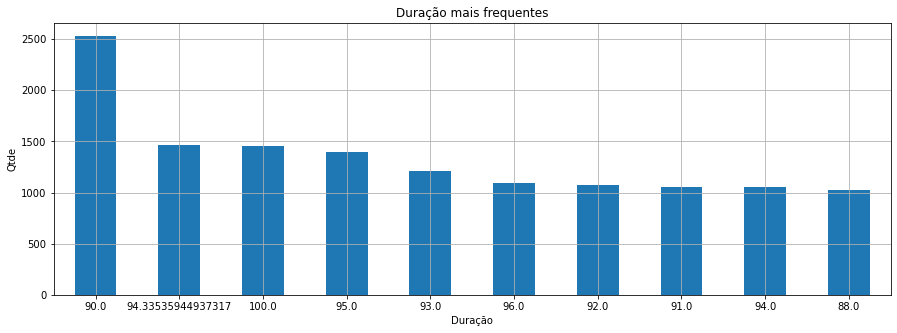

In [232]:
df.groupby(by='duracao').size().sort_values(ascending = False).head(10).plot.bar()

plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Duração')
plt.title('Duração mais frequentes')

## FEATURE IDIOMAS FALADOS (TRADUÇÕES)

In [233]:
df.idiomas_falados.head(3)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
Name: idiomas_falados, dtype: object

In [234]:
df.idiomas_falados.describe()

count                                        44995
unique                                        1925
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22311
Name: idiomas_falados, dtype: object

In [235]:
from ast import literal_eval
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_idiomas_falados'] = df['idiomas_falados'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

,novo_idiomas_falados,idiomas_falados,titulo_original
0,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,"[English, Français]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men


In [236]:
df.novo_idiomas_falados.value_counts()

[English]                   22311
[]                           3604
[Français]                   1841
[日本語]                        1275
[Italiano]                   1208
                            ...  
[English, қазақ, Română]        1
[বাংলা, Český, English]         1
[Pусский, Español]              1
[العربية, ]                     1
[, తెలుగు, हिन्दी]              1
Name: novo_idiomas_falados, Length: 1401, dtype: int64

Conforme observado acima, há 777 registros sem idioma/tradução. Para cada um destes valores, será pego o idioma original e transformado para a lingua de tradução do filme

In [237]:
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['novo_idiomas_falados'][t]) == 0):
        #print ('registro zerado', df.lingua_original[t], df.novo_idiomas_falados[t])
        df['novo_idiomas_falados'][t].append(df.lingua_original[t])
        if df.lingua_original[t] not in lista_idiomas_originais:
            lista_idiomas_originais.append(df.lingua_original[t])
        z = z + 1
    t = t + 1
print ("total de registros atualizados", z)

total de registros 44995


NameError: name 'lista_idiomas_originais' is not defined

In [238]:
# Validando se os registros zerados foram atualizados
df.novo_idiomas_falados.value_counts().head(20)

[English]                       22311
[]                               3603
[Français]                       1841
[日本語]                            1275
[Italiano]                       1208
[Español]                         879
[Pусский]                         803
[Deutsch]                         754
[English, Français]               681
[English, Español]                570
[हिन्दी]                          480
[English, Deutsch]                461
[한국어/조선말]                         423
[普通话]                             343
[English, Italiano]               326
[svenska]                         309
[No Language]                     297
[Português]                       273
[suomi]                           260
[English, Français, Deutsch]      224
Name: novo_idiomas_falados, dtype: int64

Text(0.5, 1.0, 'Os 10 idiomas mais frequentes')

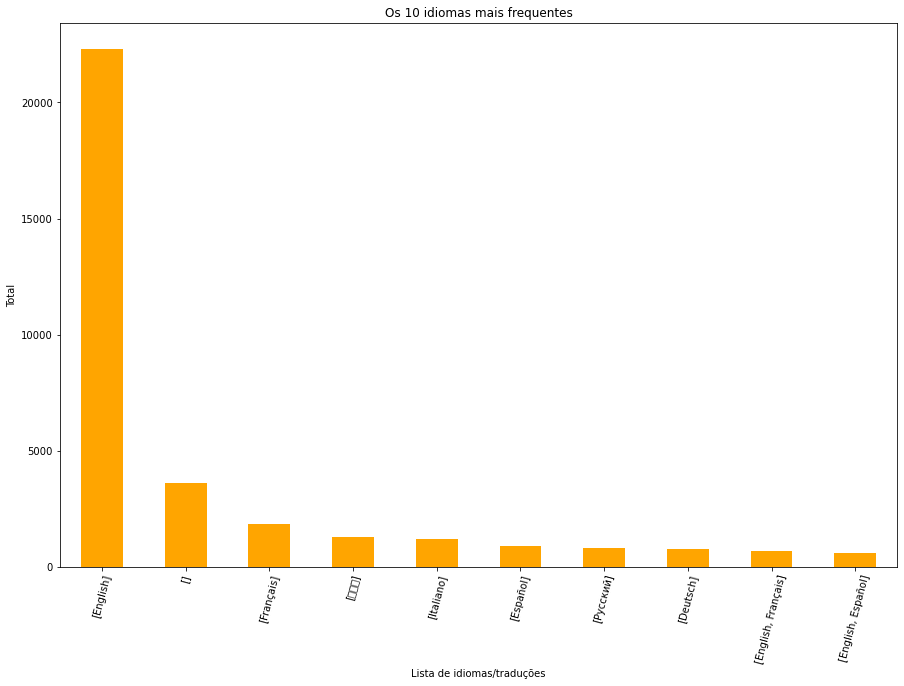

In [239]:
# plotando os generos
df.novo_idiomas_falados.value_counts().head(10).plot.bar(color='orange')

plt.xticks(rotation=75)
plt.xlabel("Lista de idiomas/traduções")
plt.ylabel("Total")
plt.title("Os 10 idiomas mais frequentes")

In [240]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(df.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = df.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = df.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  44995


KeyError: 19264

In [241]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
idiomas_falados_x = te.fit(df['novo_idiomas_falados']).transform(df['novo_idiomas_falados'])
df_novo_idiomas_falados = pd.DataFrame(idiomas_falados_x, columns=te.columns_)

# resetando os índices
df_novo_idiomas_falados = df_novo_idiomas_falados.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df['novo_idiomas_falados']], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy(

SyntaxError: unexpected EOF while parsing (<ipython-input-241-2e37a2d7cdbf>, line 12)

In [242]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_idiomas_falados.drop(['index'],axis = 1, inplace = True)

KeyError: "['index'] not found in axis"

In [243]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_idiomas = df_novo_idiomas_falados.columns
print (lista_idiomas)
tam = len(lista_idiomas)
print ("total de idiomas", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada idioma
#print (type (lista_totais))

while x < tam:
    idiomas = lista_idiomas[x]
    total_idiomas = sum(df_novo_idiomas_falados[idiomas] == True)    
    print ('idiomas: ', idiomas, '|',total_idiomas)
    x += 1
    lista_totais.append (total_idiomas)

lista_total_idiomas_producao = list(zip(lista_totais,lista_idiomas))

del(lista_total_idiomas_producao[0]) # excluindo o valor index

print (lista_total_idiomas_producao)

NameError: name 'df_novo_idiomas_falados' is not defined

In [244]:
# Deletrando os registros com valor '?????' e '??????'
del(lista_total_idiomas_producao[0:2])

# validando a exclusão
lista_total_idiomas_producao

NameError: name 'lista_total_idiomas_producao' is not defined

In [245]:
# ordenando e revertendo a ordenação
lista_total_idiomas_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_total_idiomas_producao[0:10]

NameError: name 'lista_total_idiomas_producao' is not defined

In [246]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_total_idiomas_producao[0:10]]
y = [v[0] for v in lista_total_idiomas_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 30000)

plt.xticks(rotation=75)

plt.xlabel("Idiomas")
plt.ylabel("Total")
plt.title("Total de idiomas disponíveis no filmes")

plt.show()

NameError: name 'lista_total_idiomas_producao' is not defined

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [247]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*